By Daniel Lakens, 2016. 
This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/

In [1]:
system("date", intern=TRUE)



[1] "Sun Jan 12 00:16:02 UTC 2020"

In [0]:
n<-2000 #total number of datapoints (per condition) you are willing to collect after initial 10

D<-0.0 #True effect size (Keep SD below to 1, otherwise, this is just mean dif, not d)
SD<-1 #Set True standard deviation.

p<-numeric(n) #store p-values
x<-numeric(n) #store x-values
y<-numeric(n) #store y-values

In [0]:
n<-n+10 #script calculates p-values after 10 people in each condition, so add 10 to number of datapoints

for(i in 10:n){ #for each simulated participants after the first 10
  x[i]<-rnorm(n = 1, mean = 0, sd = SD)
  y[i]<-rnorm(n = 1, mean = D, sd = SD)
  z<-t.test(x[1:i],y[1:i], var.equal=TRUE) #perform the t-test
  p[i]<-z$p.value 
}

p<-p[10:n] #Remove first 10 empty p-values

[1] 0.1038163

The lowest p-value was observed at sample size 12The p-value dropped below 0.05 for the first time as sample size NA

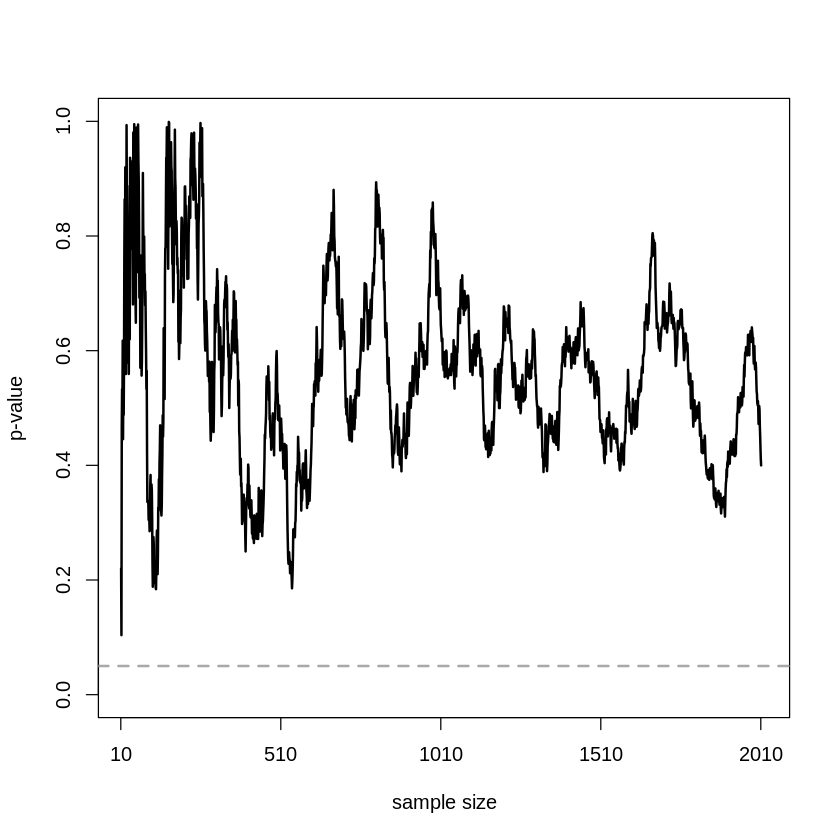

In [4]:
#Create the plot
#png(file="p-value_over_time.png",width=4000,height=2000, , units = "px", res = 500)
plot(0, col="red", lty=1, lwd=3, ylim=c(0,1), xlim=c(10,n), type="l", xlab='sample size', ylab='p-value', cex.lab=1, cex.axis=1, xaxt = "n")
lines(p, lwd=2)
abline(h=0.05, col="darkgrey", lty=2, lwd=2) #draw ine at p = 0.05
axis(1, at=seq(0, n-10, by=(n-10)/4), labels = seq(10, n, by=(n-10)/4))
#dev.off()

min(p) #Return lowest p-value from all looks
cat("The lowest p-value was observed at sample size",which.min(p)+10) #Return the sample size at which the p-value was smallest
cat("The p-value dropped below 0.05 for the first time as sample size",which(p<0.05)[1]+10) #Return the sample size at which the p-value dropped below 0.05 for the first



In [5]:
system("date", intern=TRUE)

[1] "Sun Jan 12 00:16:03 UTC 2020"